## Required Modules

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/glennhkm/Documents/Machine Learning/MK/Tugas1_Kelompok/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Loading

In [300]:
path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")

print("Path to dataset files:", path)

Path to dataset files: /home/glennhkm/.cache/kagglehub/datasets/catherinerasgaitis/mxmh-survey-results/versions/1


In [301]:
path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")

data = pd.read_csv(path + "/mxmh_survey_results.csv")
data.head(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


## Data Understanding 

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [335]:
data_feature_used = data.drop(columns=['Timestamp', 'Permissions'])
categorical_features = data_feature_used.select_dtypes(include=['object']).columns
numerical_features = data_feature_used.select_dtypes(include=['int64', 'float64']).columns

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: Index(['Primary streaming service', 'While working', 'Instrumentalist',
       'Composer', 'Fav genre', 'Exploratory', 'Foreign languages',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Music effects'],
      dtype='object')
Numerical features: Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD'],
      dtype='object')


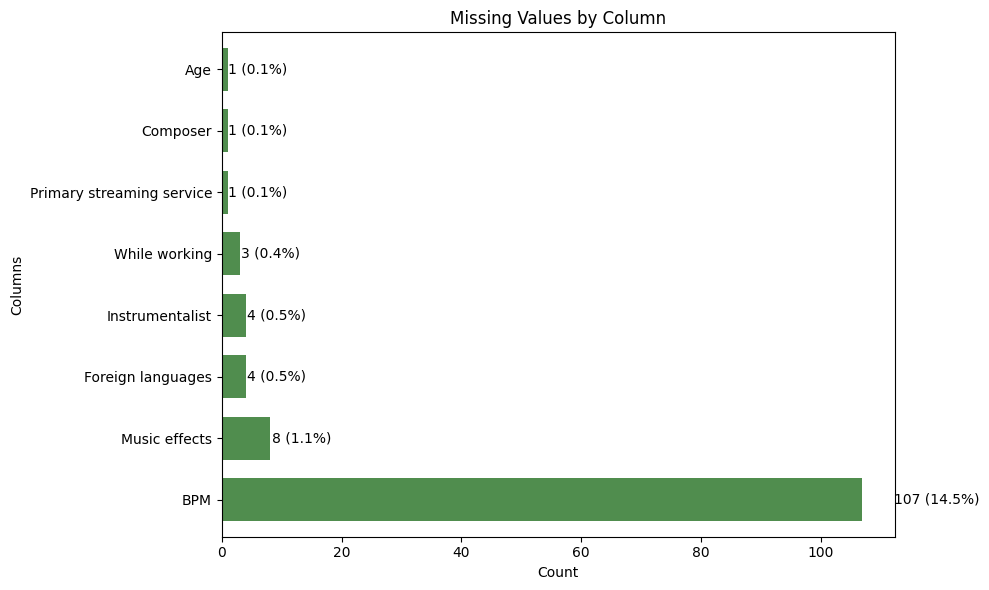

In [336]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]

plt.figure(figsize=(10, 6))
missing_data['Missing Values'].plot(kind='barh', color='#508D4E', width=0.7)
plt.ylabel('Columns')
plt.xlabel('Count')
plt.title('Missing Values by Column')

for i, value in enumerate(missing_data['Missing Values']):
    plt.text(value + 0.05 * value, i, f'{value} ({missing_data["Percentage"].iloc[i]:.1f}%)', va='center')

plt.tight_layout()
plt.show()


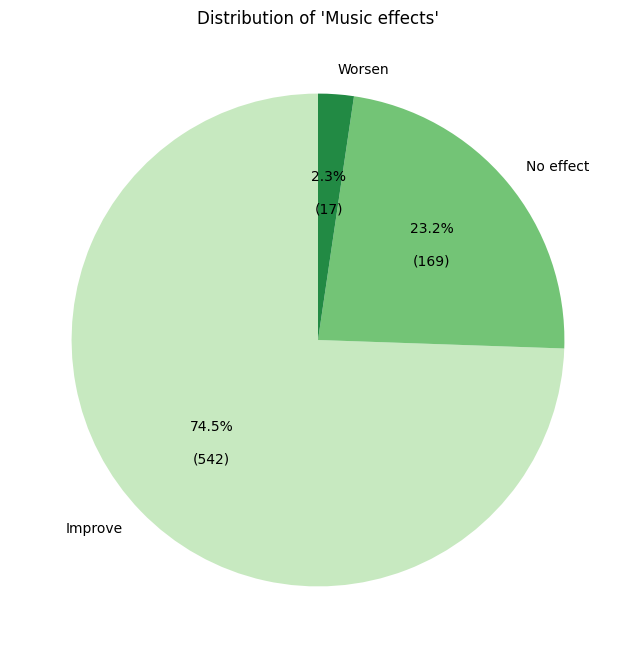

In [337]:
music_effects = data['Music effects'].value_counts()

plt.figure(figsize=(8, 8))
def autopct_format(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))
    return f"{pct:.1f}%\n\n({absolute})"

plt.pie(
    music_effects.values, 
    labels=music_effects.index, 
    autopct=lambda pct: autopct_format(pct, music_effects.values), 
    startangle=90, 
    colors=sns.color_palette("Greens", len(music_effects))
)
plt.title("Distribution of 'Music effects'")
plt.ylabel("")
plt.show()


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

The most frequent genre is: Rock


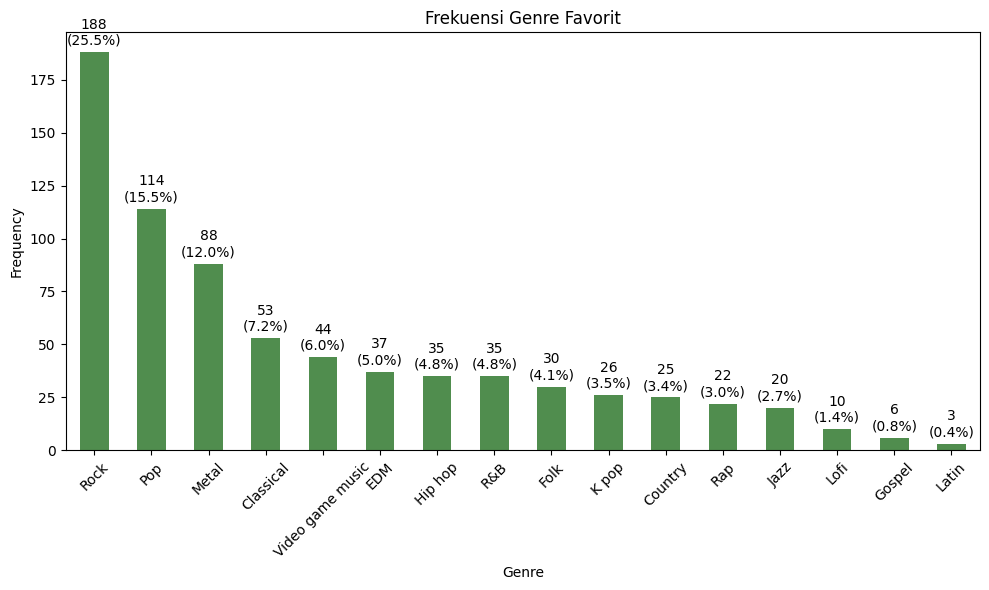

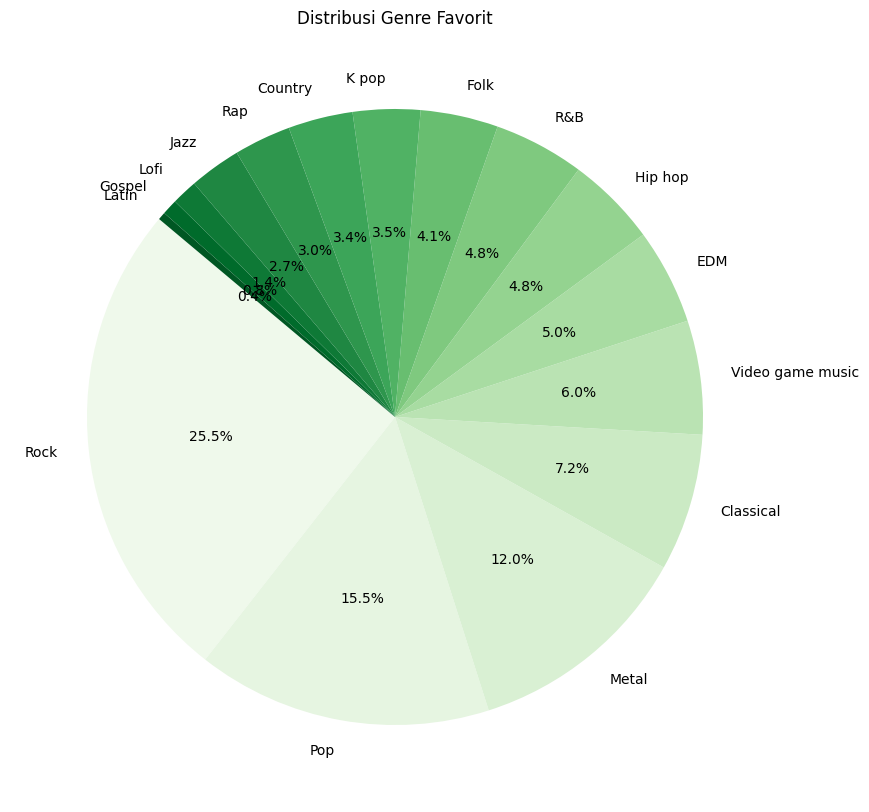

In [339]:
most_frequent_genre = data['Fav genre'].value_counts().idxmax()
print("The most frequent genre is:", most_frequent_genre)

genre_counts = data['Fav genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='#508D4E')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frekuensi Genre Favorit')
plt.xticks(rotation=45)

for i, count in enumerate(genre_counts):
    percentage = (count / genre_counts.sum()) * 100
    plt.text(i, count + 2, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(
    genre_counts.values, 
    labels=genre_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("Greens", len(genre_counts))
)
plt.title('Distribusi Genre Favorit')
plt.show()


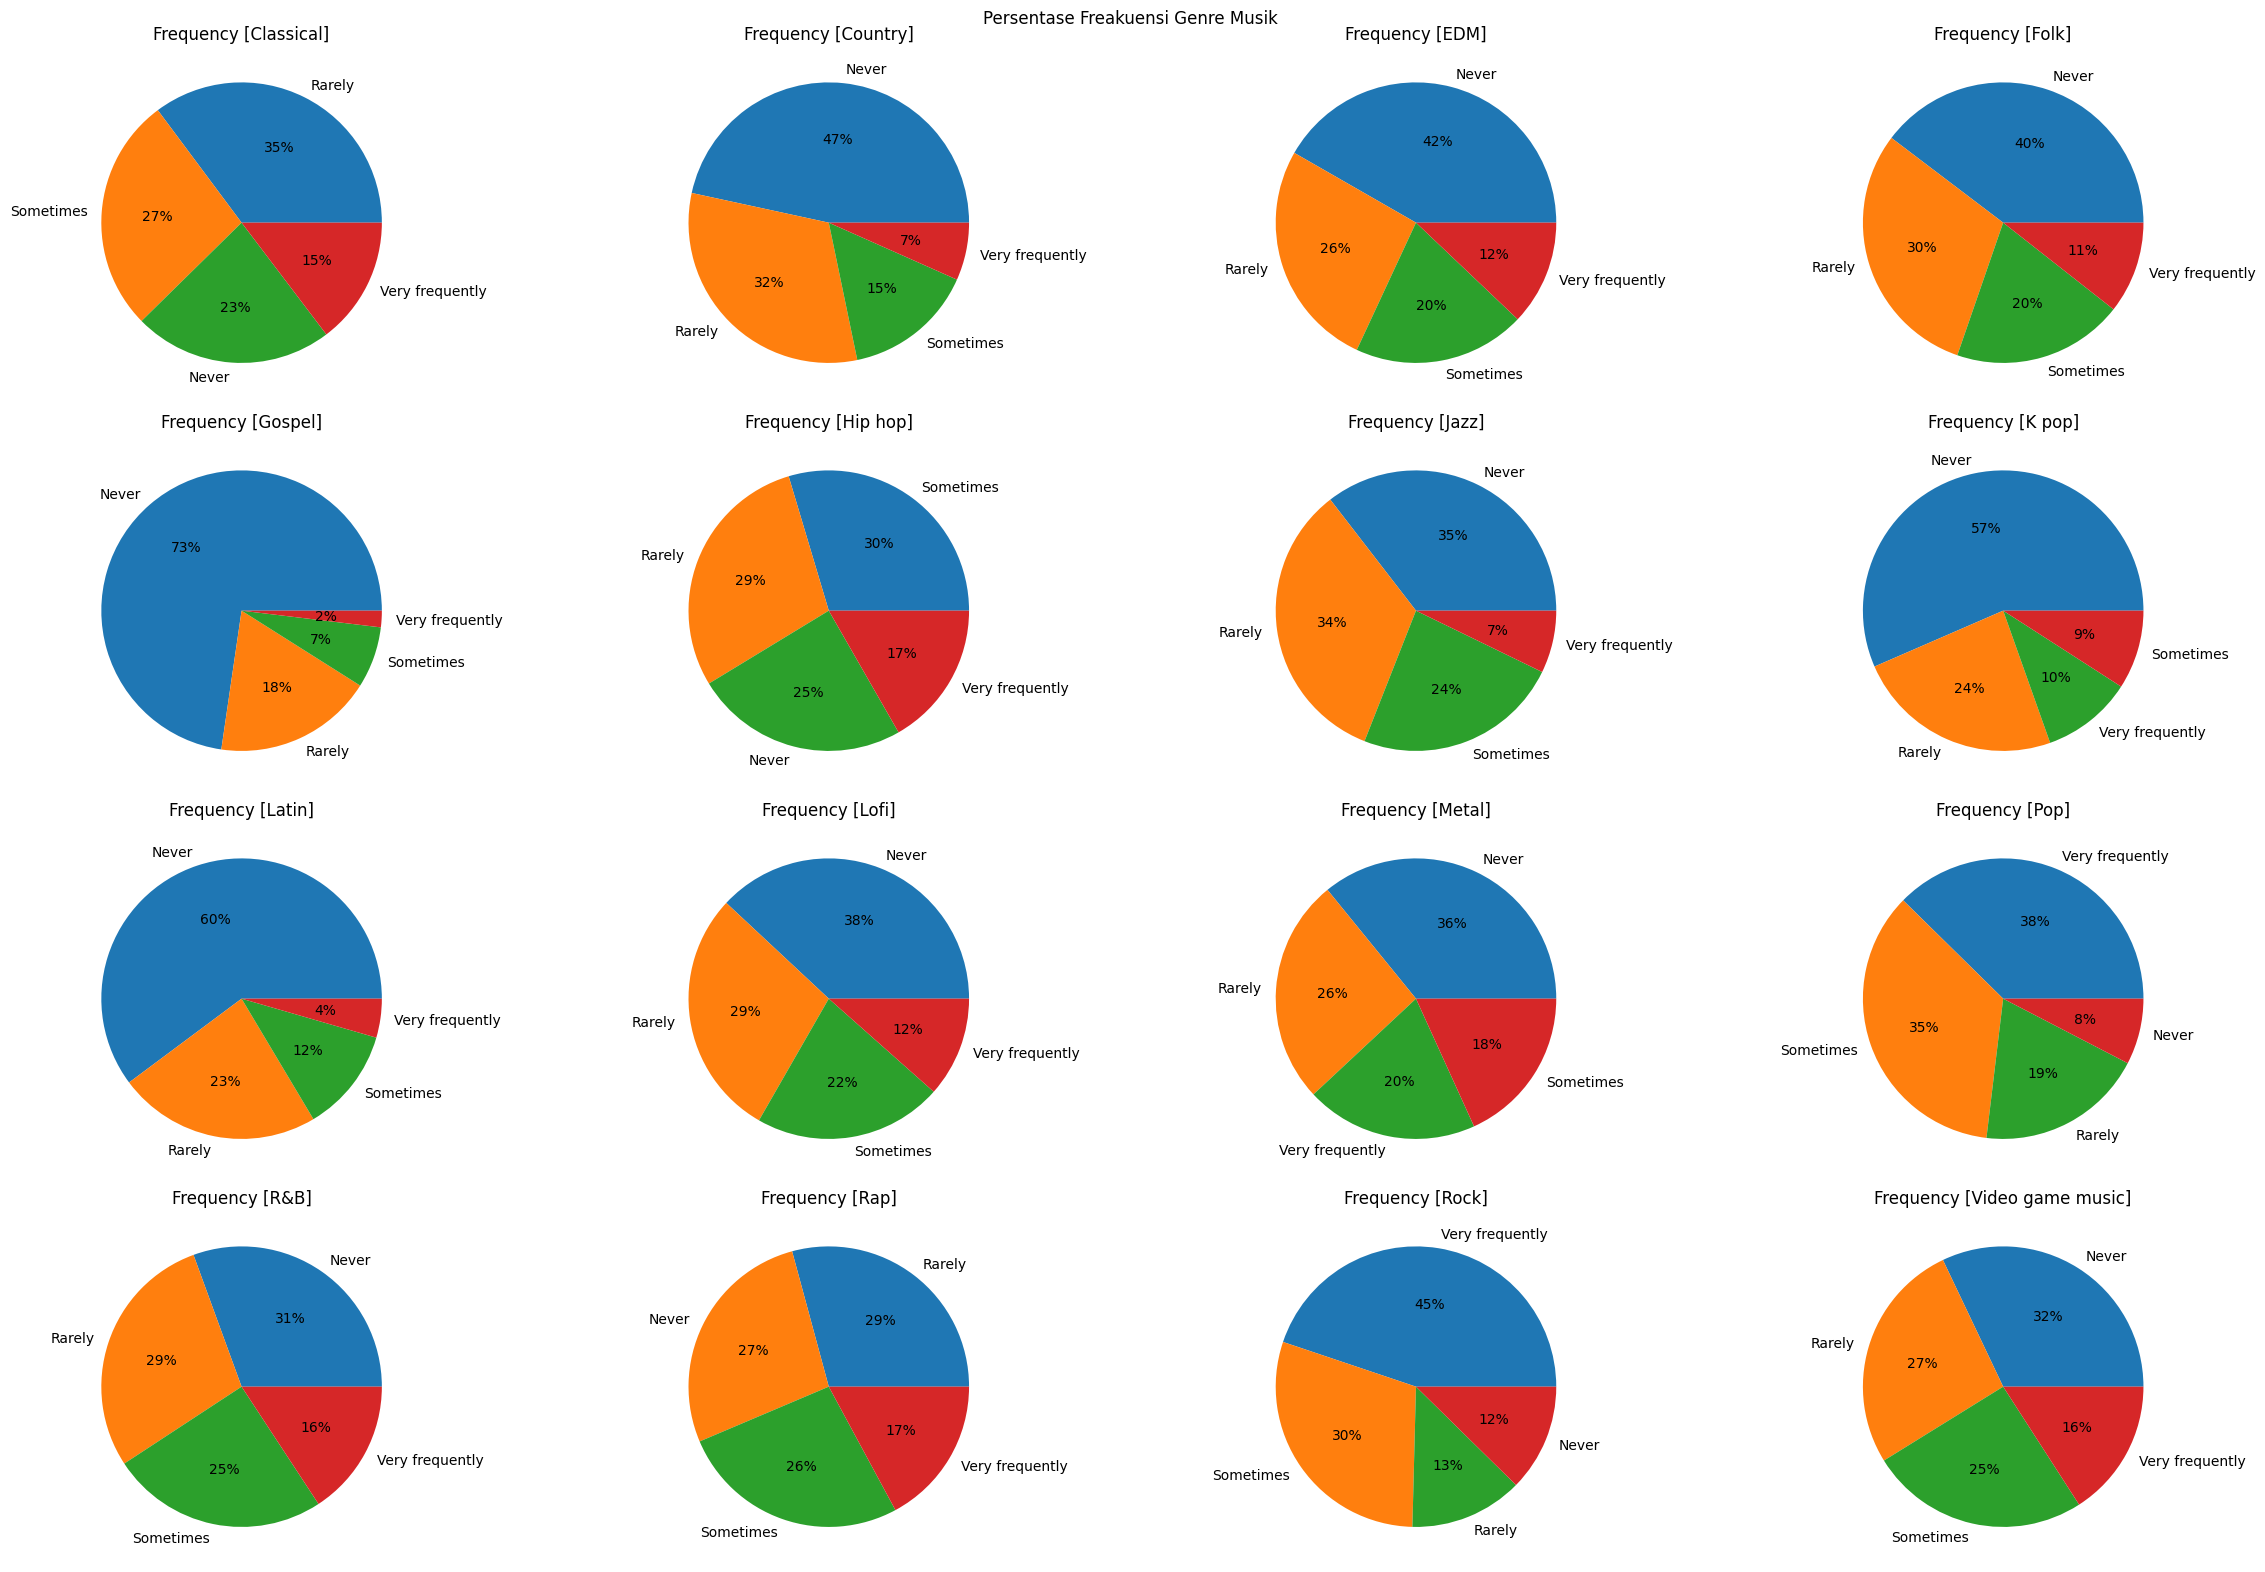

In [340]:
plt.figure(figsize = (24, 16))

for idx, col in enumerate(data.iloc[:, 11:27][:5].columns):
    sorted_col = data[col].sort_values(ascending = False)
    plt.subplot(4, 4, idx+1)
    plt.pie(x = sorted_col.value_counts().values,
            labels = sorted_col.value_counts().index.values,
            autopct = "%1.f%%")
    plt.title(col)

plt.suptitle("Persentase Freakuensi Genre Musik")
plt.tight_layout()

In [341]:
data_cleaned = data.dropna()

print("Data shape before cleaning:", data.shape)
print("Data shape after cleaning:", data_cleaned.shape)

Data shape before cleaning: (736, 33)
Data shape after cleaning: (616, 33)


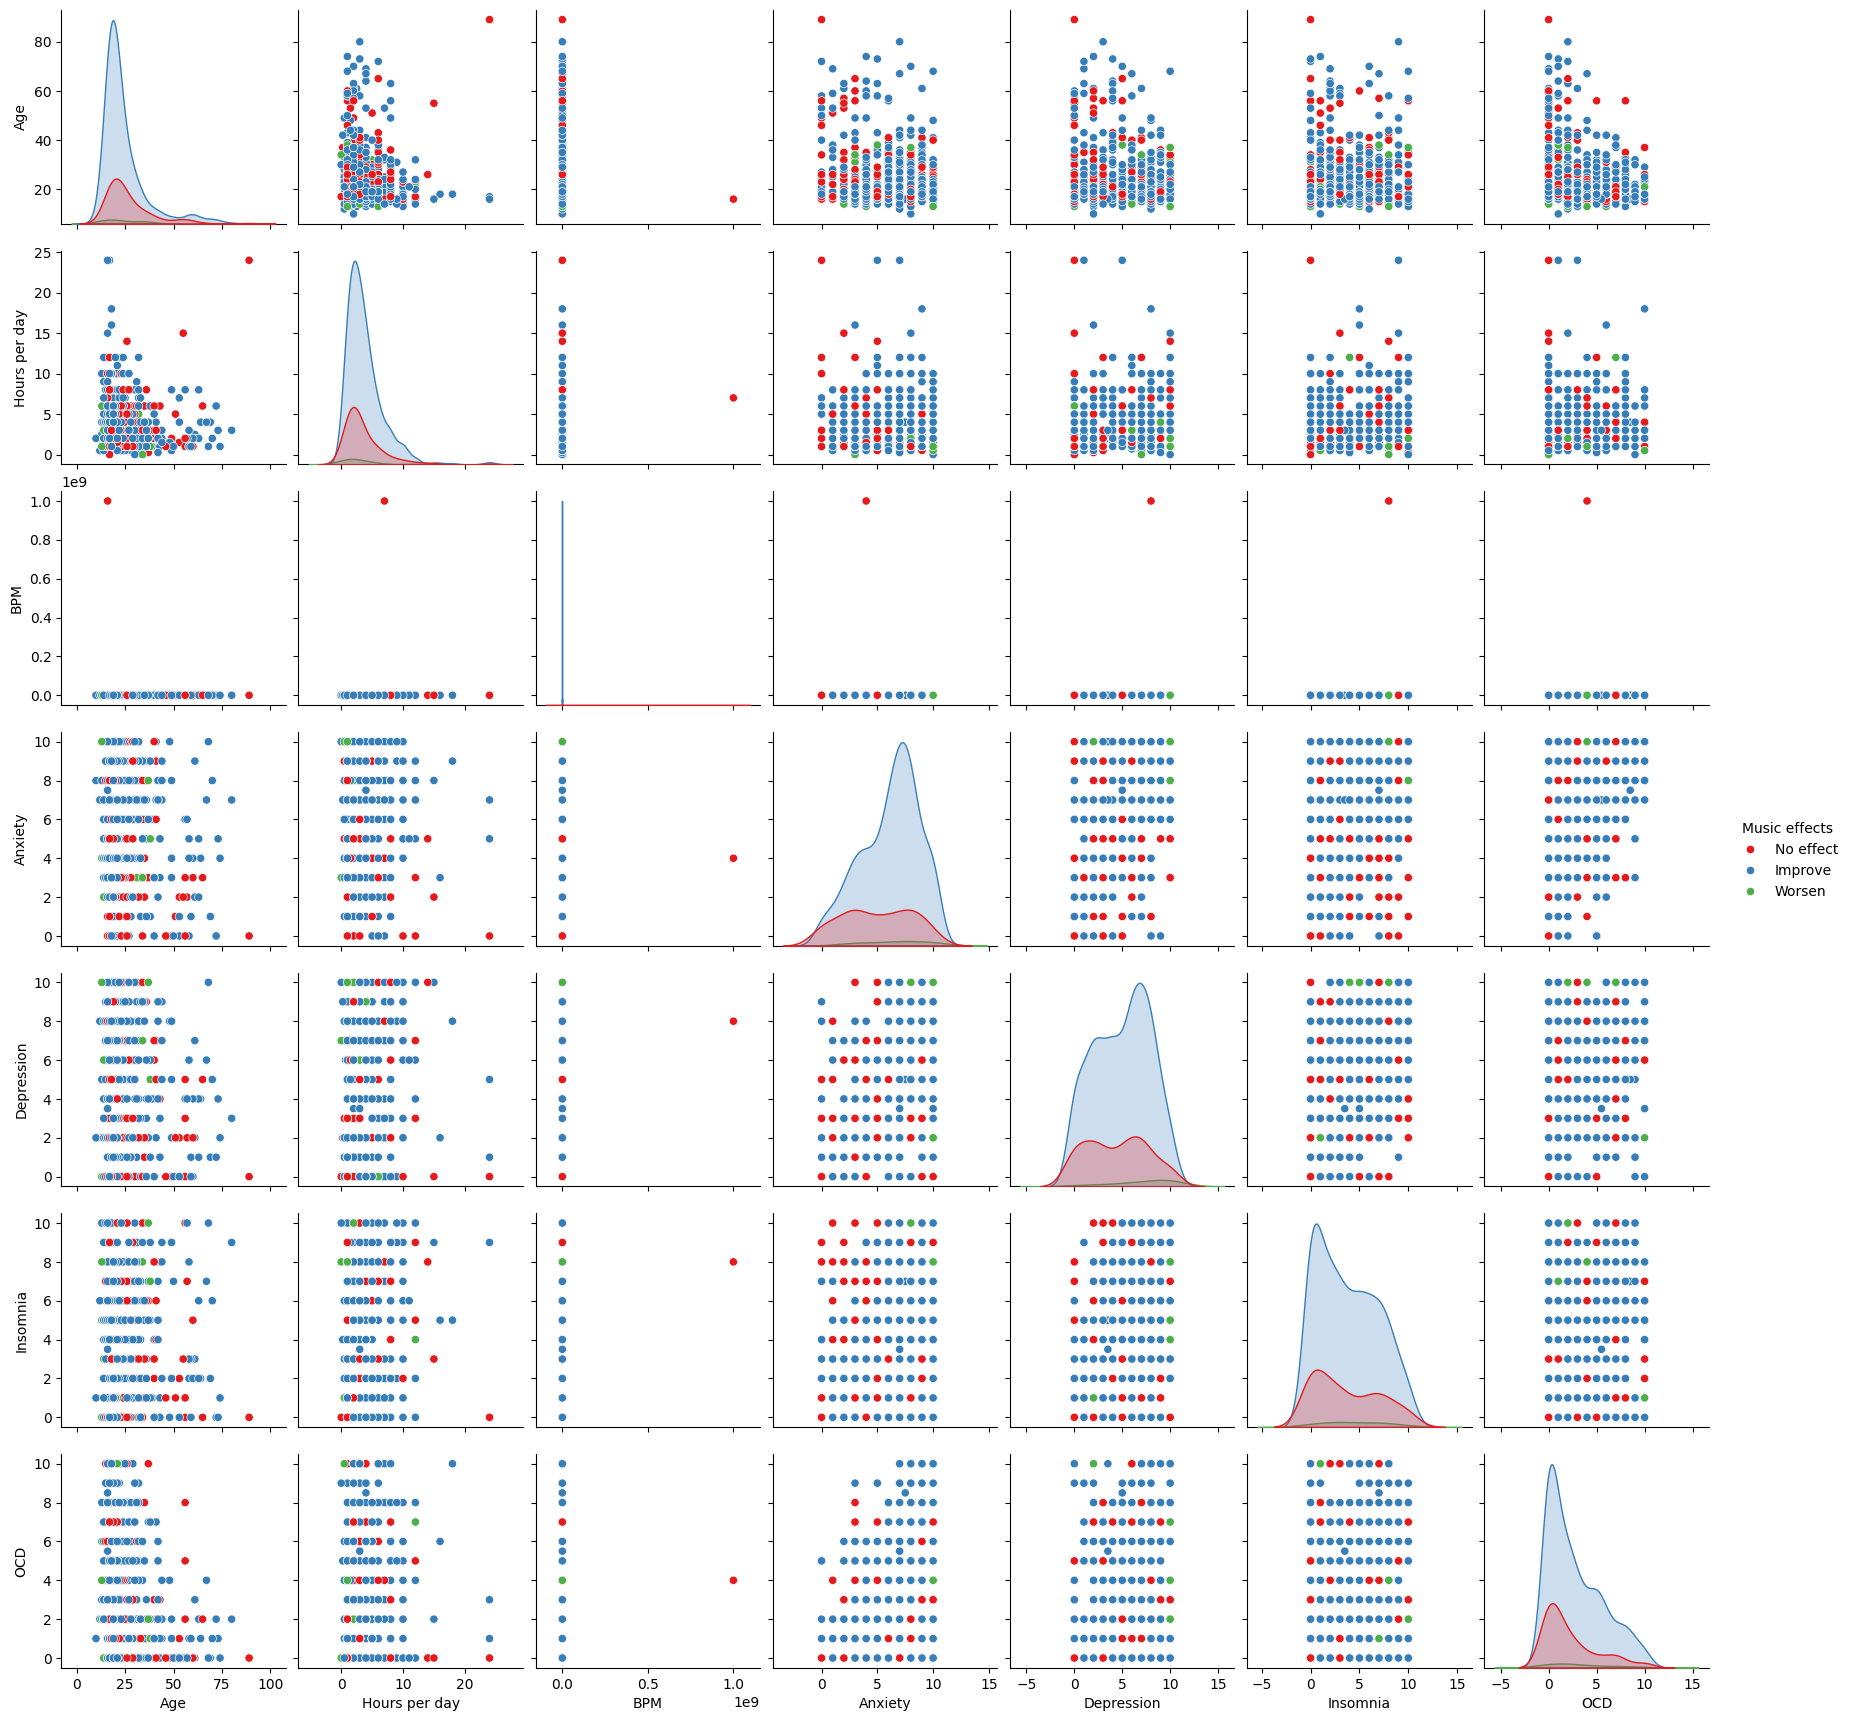

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features_pairplot = numerical_features.append(pd.Index(['Music effects']))
sns.pairplot(data_cleaned[numerical_features_pairplot], hue="Music effects", palette="Set1")

plt.show()


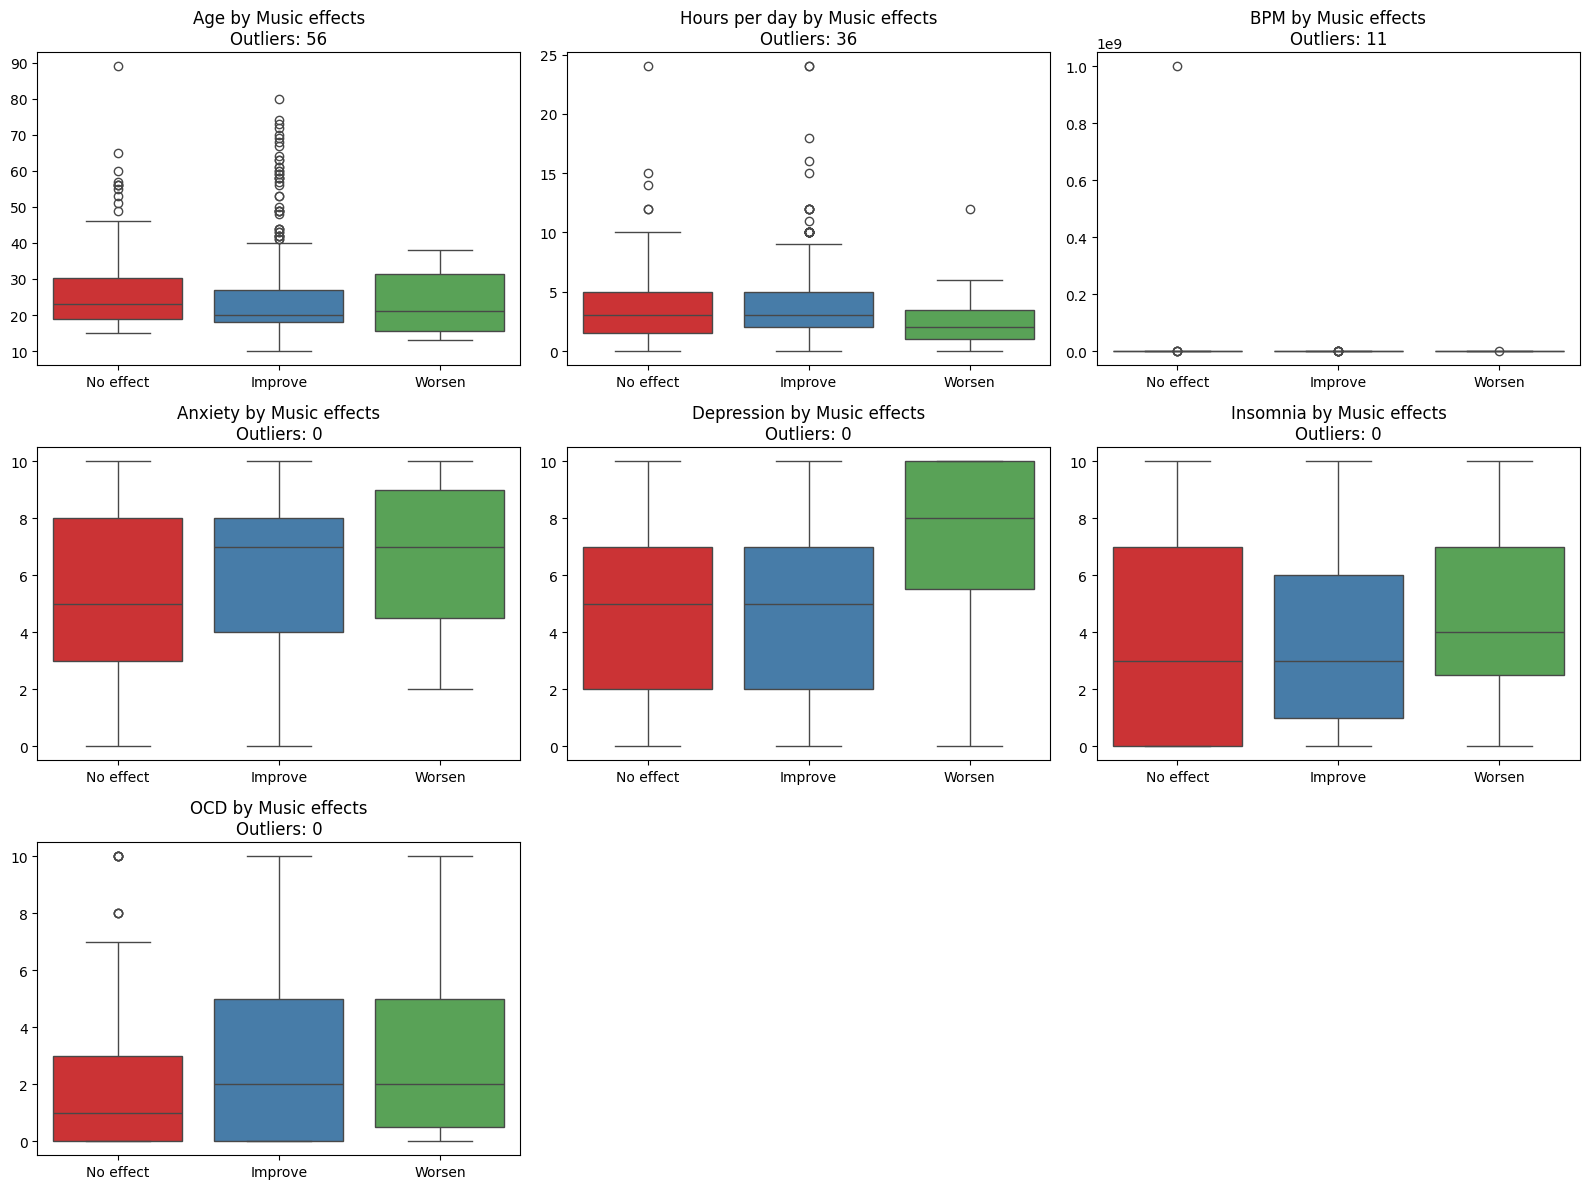

In [343]:
import numpy as np

# Fungsi untuk menghitung jumlah outlier berdasarkan metode IQR
def count_outliers(data, column):
    Q1 = np.percentile(data[column], 25)  # Kuartil pertama
    Q3 = np.percentile(data[column], 75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Hitung jumlah outlier untuk setiap fitur numerik
outlier_counts = {feature: count_outliers(data_cleaned, feature) for feature in numerical_features}

# Boxplot visualization
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Music effects', hue='Music effects', y=feature, data=data_cleaned, palette='Set1')
    plt.title(f'{feature} by Music effects\nOutliers: {outlier_counts[feature]}')  # Tampilkan jumlah outlier di title
    plt.ylabel('')
    plt.xlabel('')
plt.tight_layout()
plt.show()


In [344]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

data_encoded = data.replace("", np.nan)
data_encoded = data_encoded.drop(columns=['Timestamp', 'Permissions'])

label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    
    non_null_data = data_encoded[column].dropna()
    le.fit(non_null_data)

    data_encoded.loc[data_encoded[column].notna(), column] = le.transform(non_null_data)
    
    label_encoders[column] = le

data.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [345]:
data_cleaned_encoded = data_encoded.dropna()

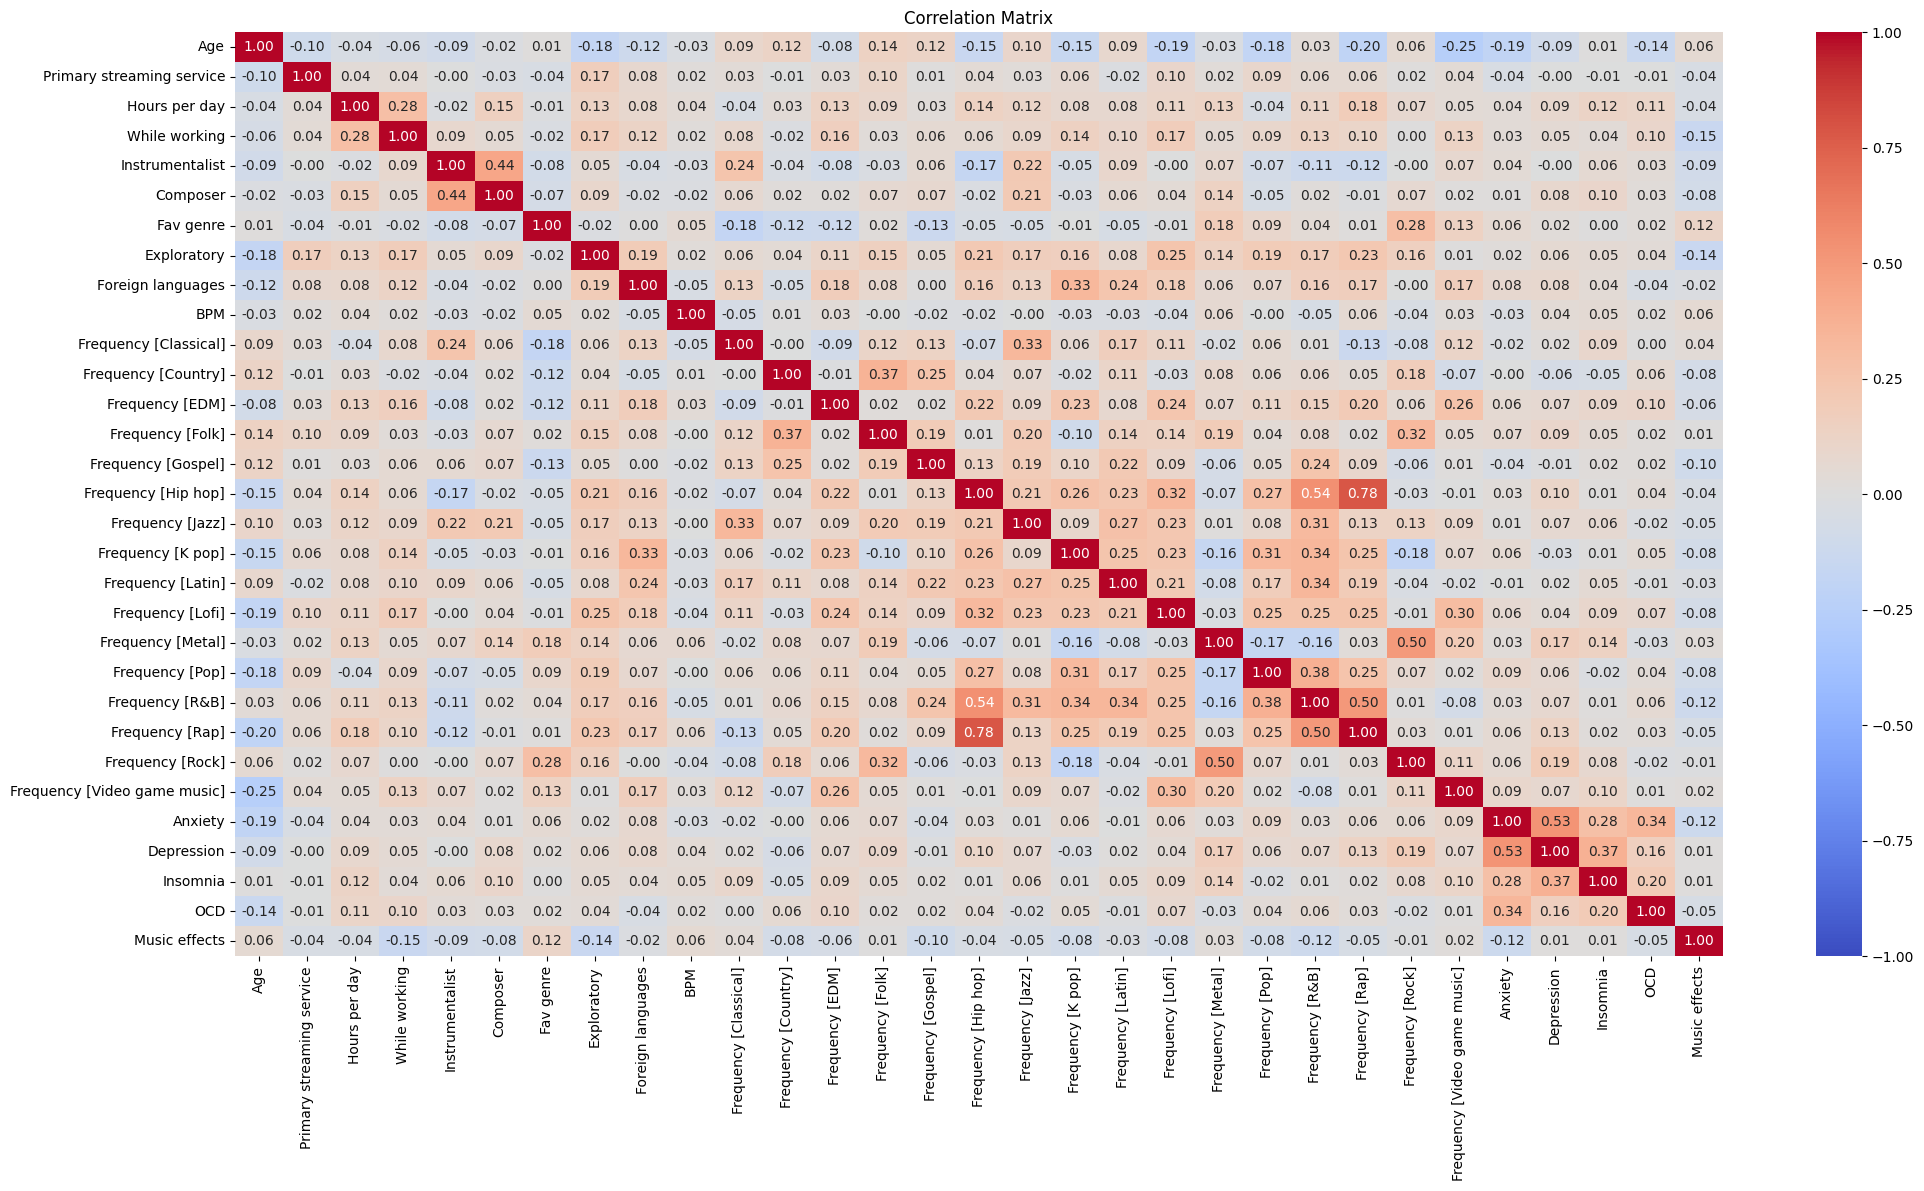

In [346]:
plt.figure(figsize=(24, 12))
sns.heatmap(data_cleaned_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()

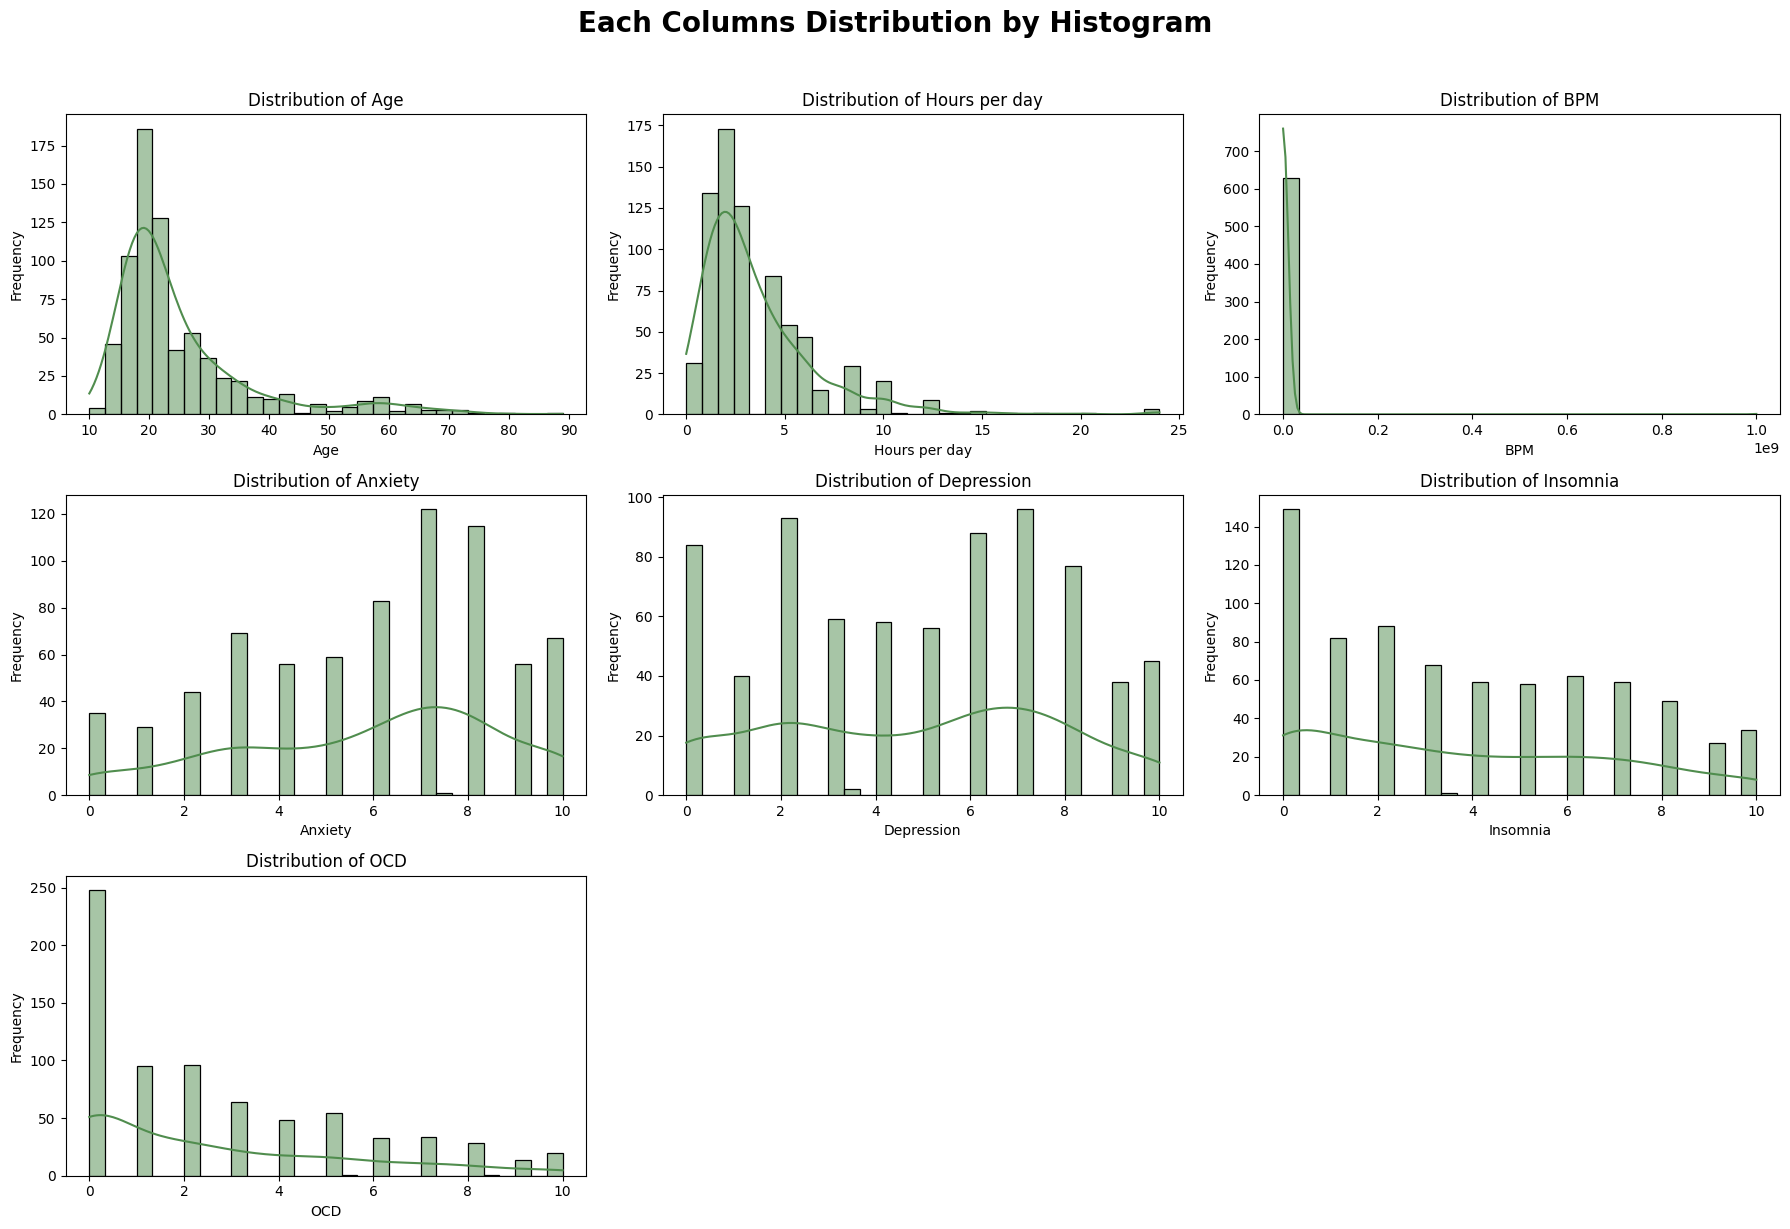

In [347]:
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_features.to_list()):
    sns.histplot(data[col].dropna(), kde=True, bins=30, ax=axes[i], color='#508D4E')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Each Columns Distribution by Histogram", fontsize=20, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

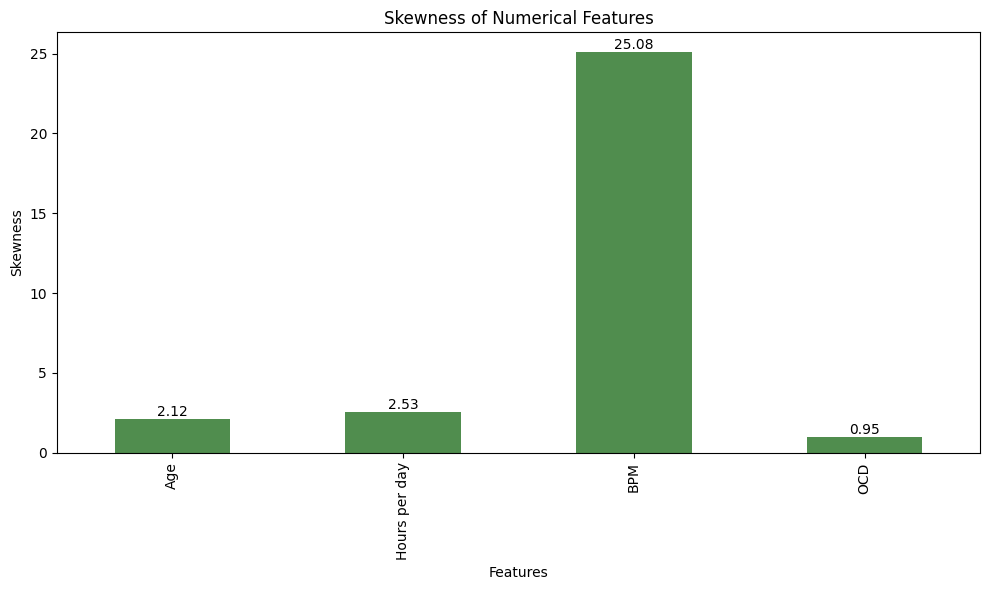

In [ ]:
skewness = data[numerical_features].skew()
skewness = skewness[abs(skewness) > 0.5]

plt.figure(figsize=(10, 6))
bars = skewness.plot(kind='bar', color='#508D4E')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.xlabel('Features')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

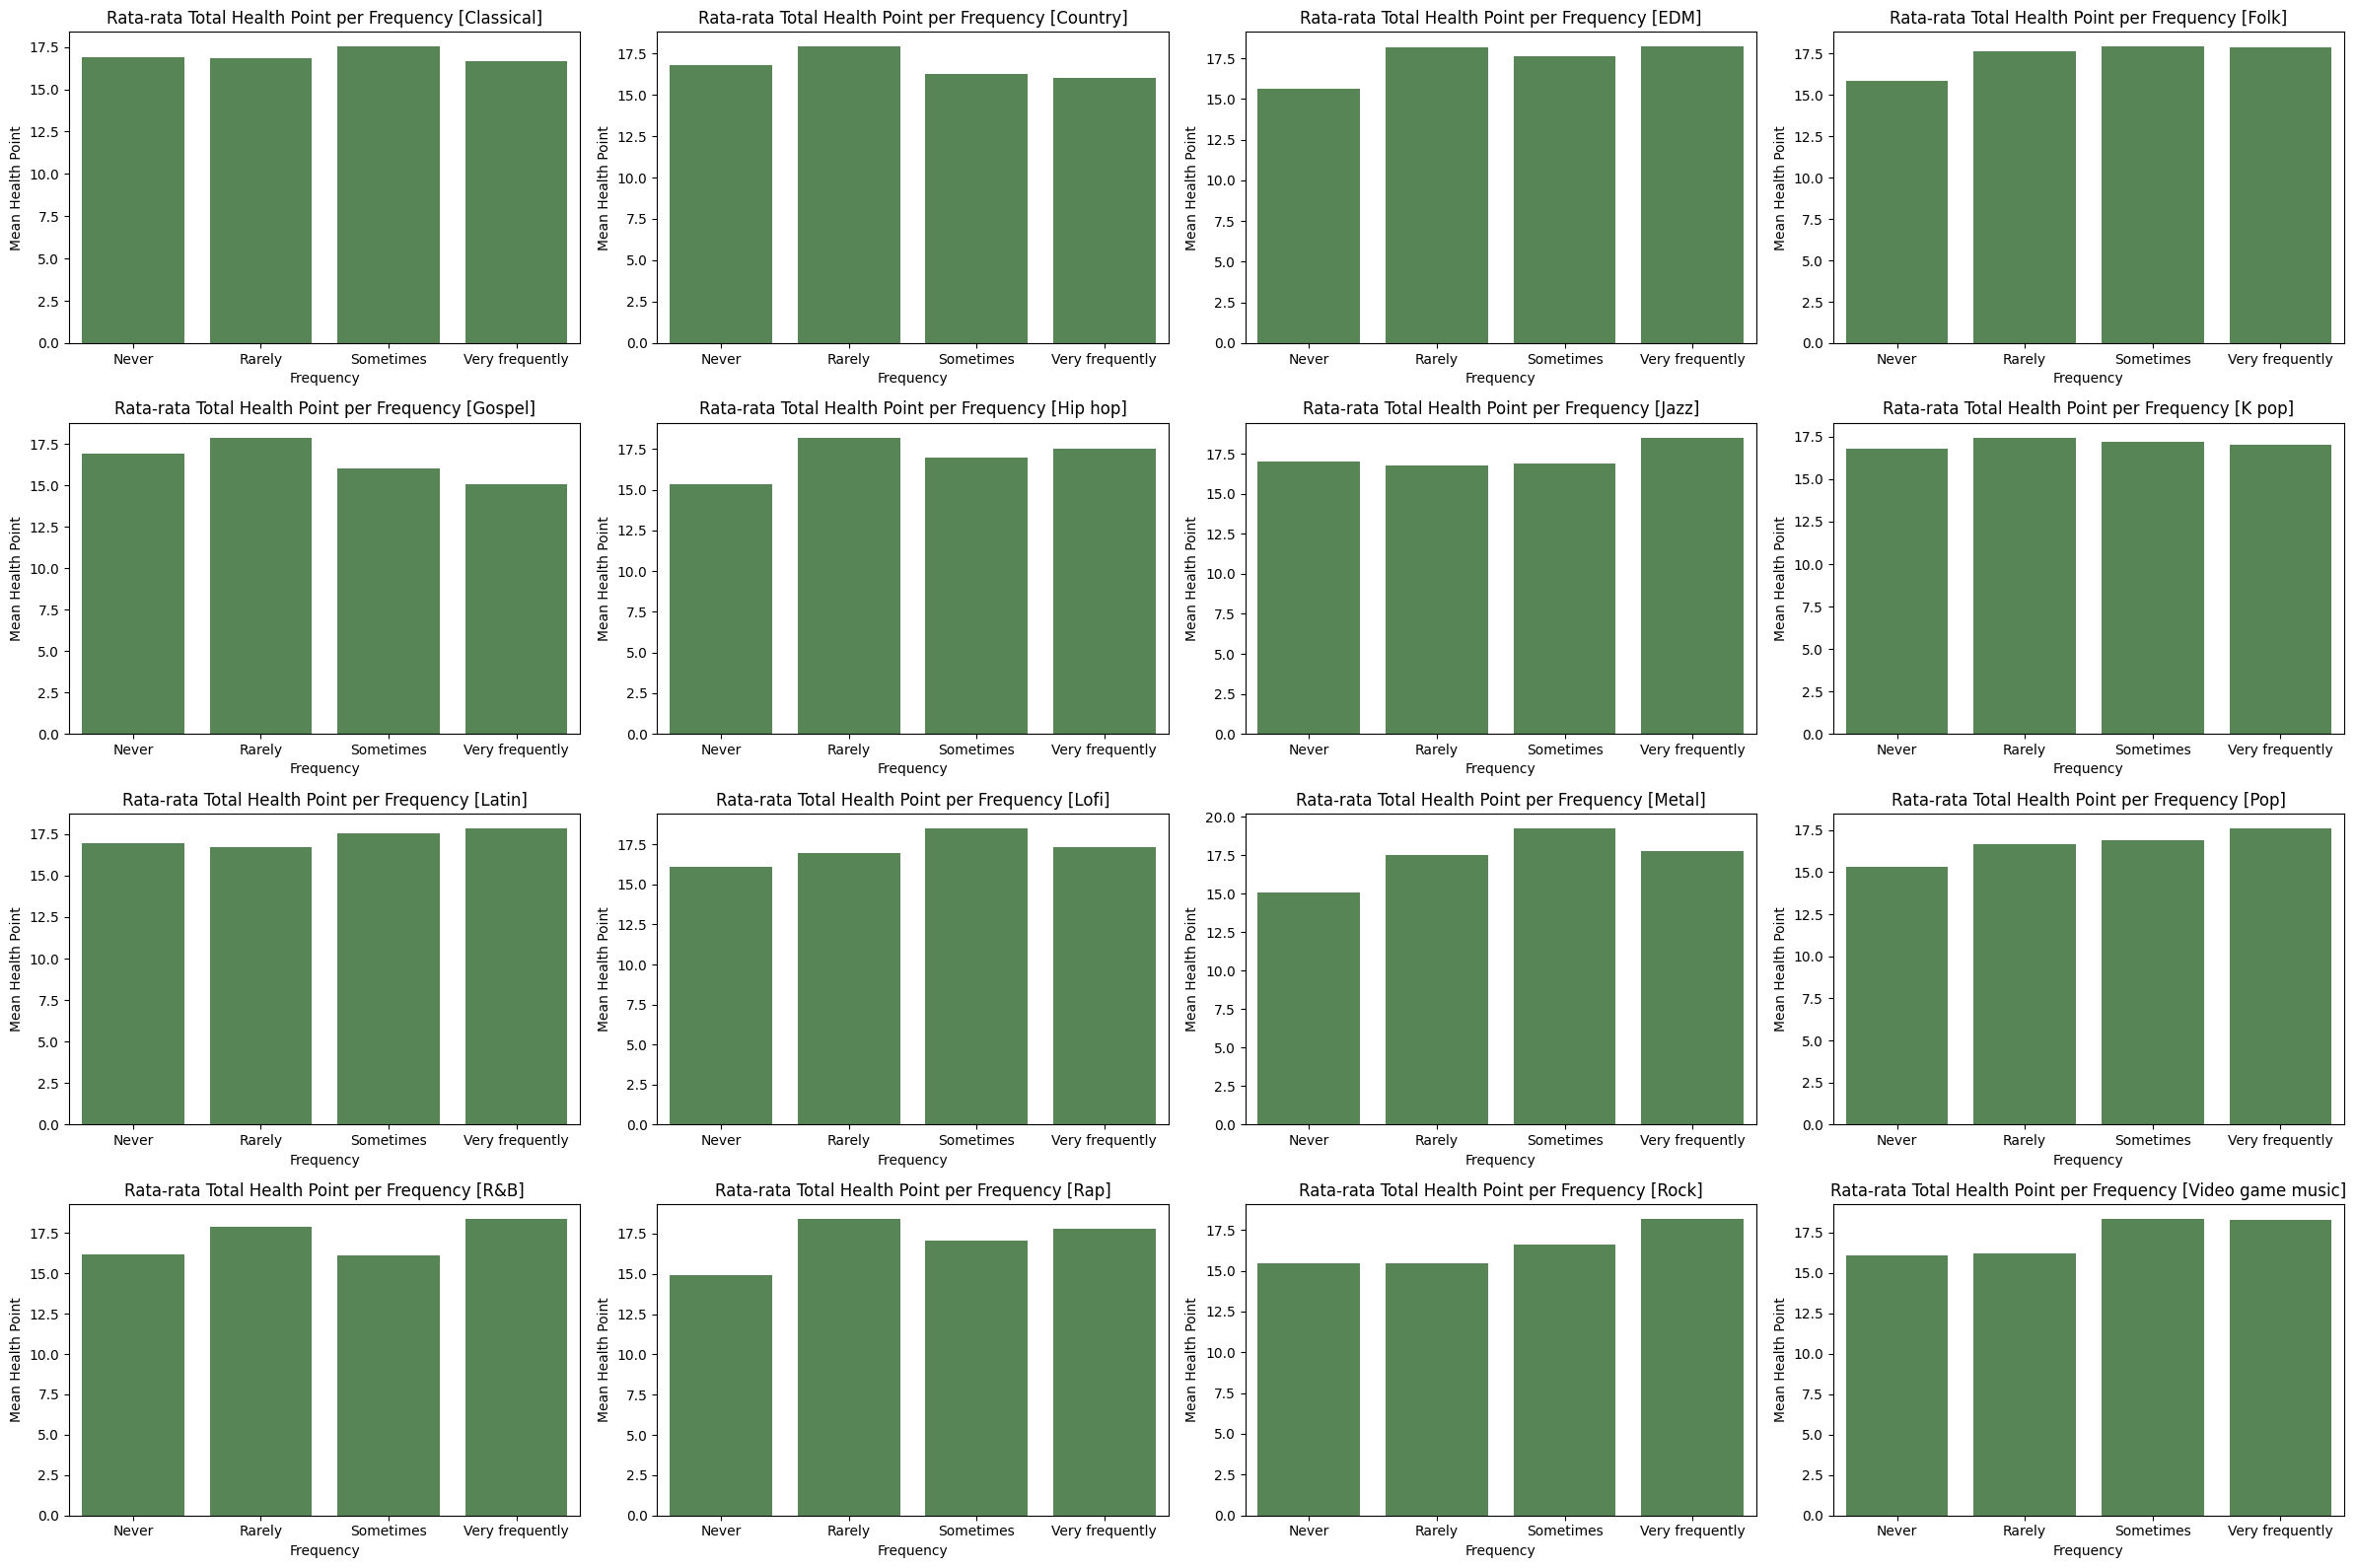

In [353]:
data['Total_Health_Point'] = data['Anxiety'] + data['Depression'] + data['Insomnia'] + data['OCD']
plt.figure(figsize = (24, 16))

for (idx, col) in enumerate(data.iloc[:, 11:27].columns):
    plt.subplot(4, 4, idx+1)
    
    sns.barplot(x = data.groupby(col)['Total_Health_Point'].mean().index.values,
                y = data.groupby(col)['Total_Health_Point'].mean().values,
                color='#508D4E')

    plt.title(f"Rata-rata Total Health Point per {col}")
    plt.xlabel("Frequency")
    plt.ylabel("Mean Health Point")


plt.tight_layout()

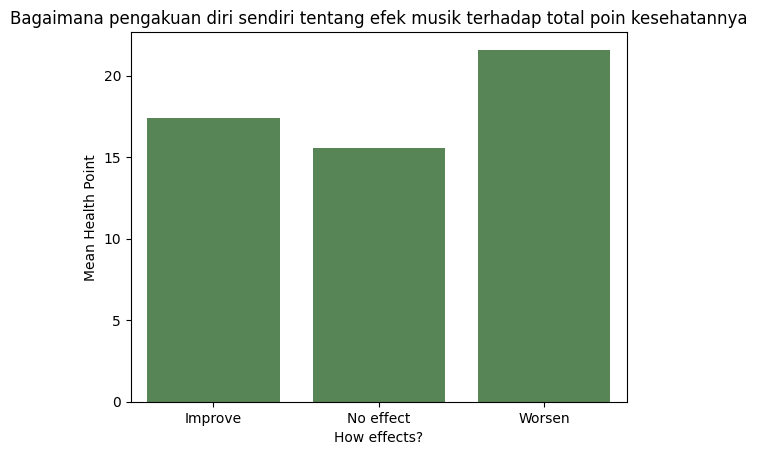

In [350]:
data.groupby("Music effects")['Total_Health_Point'].mean().index.values
data.groupby("Music effects")['Total_Health_Point'].mean().values

sns.barplot(x = data.groupby("Music effects")['Total_Health_Point'].mean().index.values,
            y = data.groupby("Music effects")['Total_Health_Point'].mean().values,
            color='#508D4E')

plt.title("Bagaimana pengakuan diri sendiri tentang efek musik terhadap total poin kesehatannya")
plt.xlabel("How effects?")
plt.ylabel("Mean Health Point")
plt.show()

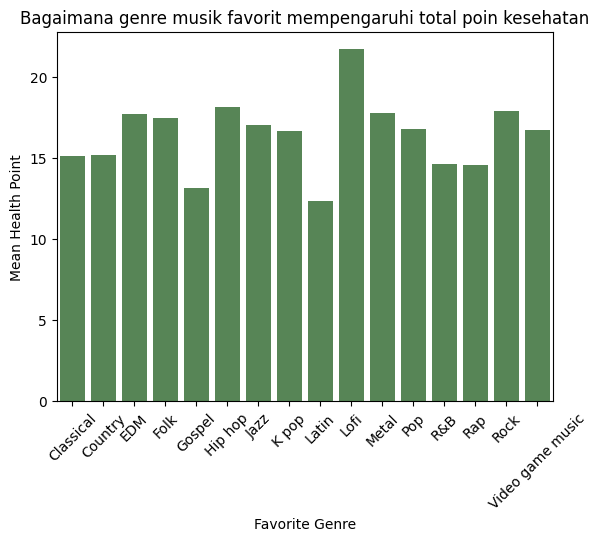

In [ ]:
data.groupby("Fav genre")['Total_Health_Point'].mean().index.values
data.groupby("Fav genre")['Total_Health_Point'].mean().values

sns.barplot(x = data.groupby("Fav genre")['Total_Health_Point'].mean().index.values,
            y = data.groupby("Fav genre")['Total_Health_Point'].mean().values,
            color='#508D4E')

plt.title("Bagaimana genre musik favorit mempengaruhi total poin kesehatan")
plt.xlabel("Favorite Genre")
plt.ylabel("Mean Health Point")
plt.xticks(rotation=45)
plt.show()  

Fav genre      Classical   Country       EDM      Folk    Gospel   Hip hop  \
Music effects                                                                
Improve         7.195572  3.690037  5.535055  4.243542  1.107011  5.719557   
No effect       7.692308  2.958580  3.550296  3.550296  0.000000  2.366864   
Worsen          5.882353  0.000000  0.000000  0.000000  0.000000  0.000000   

Fav genre          Jazz     K pop     Latin      Lofi      Metal        Pop  \
Music effects                                                                 
Improve        2.952030  3.505535  0.184502  1.845018  12.361624  15.682657   
No effect      2.366864  2.366864  0.591716  0.000000  12.426036  14.792899   
Worsen         0.000000  0.000000  0.000000  0.000000   0.000000  23.529412   

Fav genre           R&B       Rap       Rock  Video game music  
Music effects                                                   
Improve        4.797048  3.136531  23.247232          4.797048  
No effect      5.3

<Figure size 1200x600 with 0 Axes>

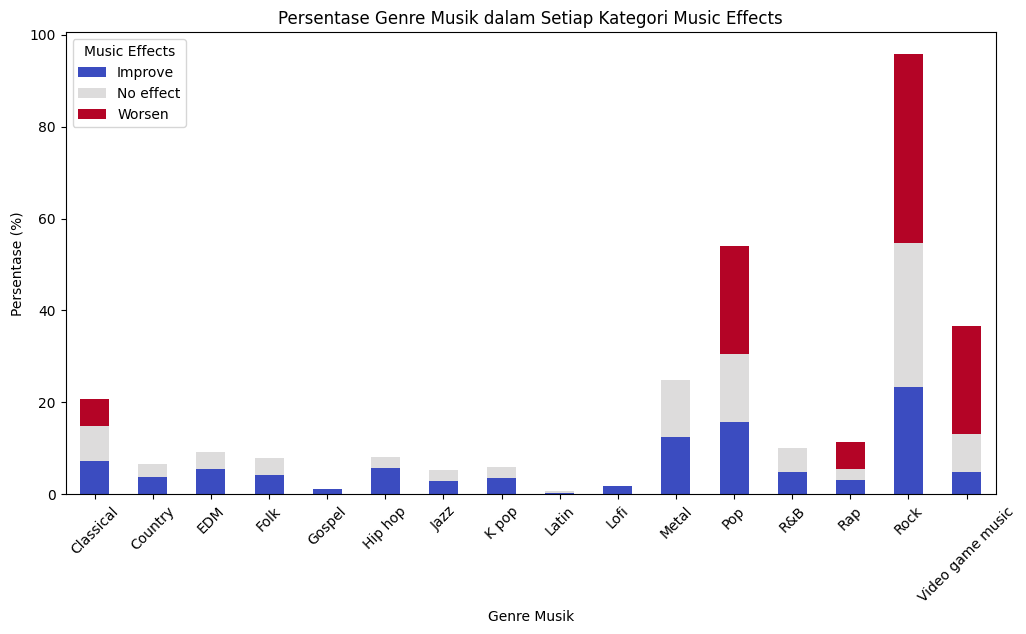

🎸 Genre yang paling sering dikaitkan dengan 'worsen' mental effects: Rock
🎵 Genre yang paling sering dikaitkan dengan 'neutral' mental effects: Rock
🎻 Genre yang paling sering dikaitkan dengan 'improve' mental effects: Rock


In [ ]:
genre_effect_distribution = data.groupby("Music effects")['Fav genre'].value_counts(normalize=True) * 100

genre_effect_df = genre_effect_distribution.unstack().fillna(0)

print(genre_effect_df)

plt.figure(figsize=(12, 6))
genre_effect_df.T.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(12, 6))
plt.title("Persentase Genre Musik dalam Setiap Kategori Music Effects")
plt.ylabel("Persentase (%)")
plt.xlabel("Genre Musik")
plt.xticks(rotation=45)
plt.legend(title="Music Effects")
plt.show()

top_genre_worsen = genre_effect_df.loc["Worsen"].idxmax()
top_genre_no_effect = genre_effect_df.loc["No effect"].idxmax()
top_genre_improve = genre_effect_df.loc["Improve"].idxmax()

print("🎸 Genre yang paling sering dikaitkan dengan 'worsen' mental effects:", top_genre_worsen)
print("🎵 Genre yang paling sering dikaitkan dengan 'neutral' mental effects:", top_genre_no_effect)
print("🎻 Genre yang paling sering dikaitkan dengan 'improve' mental effects:", top_genre_improve)



## Data Preparation

In [414]:
data_preprocessed = data.copy()
data_preprocessed = data_preprocessed.drop(columns=['Timestamp', 'Permissions'])

In [415]:
numerical_features = data_preprocessed.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data_preprocessed.select_dtypes(include=['object']).columns

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: Index(['Primary streaming service', 'While working', 'Instrumentalist',
       'Composer', 'Fav genre', 'Exploratory', 'Foreign languages',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Music effects'],
      dtype='object')
Numerical features: Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Total_Health_Point'],
      dtype='object')


### 'Age' Feature Handling

In [416]:
data_preprocessed[data_preprocessed['Age'].isnull()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Total_Health_Point
12,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,21.0


In [417]:
mean_hiphop_age = round(data_preprocessed[data_preprocessed['Fav genre'] == "Hip hop"]['Age'].mean())

print("Mean Hip Hop Age: ", mean_hiphop_age)
    
data_preprocessed['Age'] = data_preprocessed['Age'].fillna(value = mean_hiphop_age)
data_preprocessed['Age'].isnull().sum()

Mean Hip Hop Age:  23


np.int64(0)

In [418]:
missing_values = data_preprocessed.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(data_preprocessed)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data

,Missing Values,Percentage
BPM,107,14.538043
Music effects,8,1.086957
Foreign languages,4,0.543478
Instrumentalist,4,0.543478
While working,3,0.407609
Composer,1,0.135870
Primary streaming service,1,0.135870


In [419]:
print("Jumlah unique values: ", data_preprocessed['Age'].nunique())
data_preprocessed['Age'].unique()

Jumlah unique values:  61


array([18., 63., 61., 21., 19., 23., 17., 16., 15., 14., 20., 26., 37.,
       36., 24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43., 28.,
       34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56., 59.,
       10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55., 48.,
       71., 74., 51., 65., 80., 50., 68., 46., 89.])

In [420]:
data_preprocessed['Age_Category'] = pd.cut(x = data_preprocessed['Age'],
                            bins = [0, 18, 25, 40, np.max(data_preprocessed['Age']) + 1],
                            labels = ['Teenager', 'Young', 'Mature', 'Old'],
                            right = False)

data_preprocessed['Age_Category']

0         Young
1           Old
2         Young
3           Old
4         Young
         ...   
731    Teenager
732       Young
733       Young
734       Young
735      Mature
Name: Age_Category, Length: 736, dtype: category
Categories (4, object): ['Teenager' < 'Young' < 'Mature' < 'Old']

In [421]:
data_preprocessed.shape

(736, 33)

### 'Foreign languages', 'While working', 'Instrumentalist', and 'Primary streaming service' Features Handling

In [422]:
print(data_preprocessed['Foreign languages'].value_counts())
print("\n")
print(data_preprocessed['While working'].value_counts())
print("\n")
print(data_preprocessed['Instrumentalist'].value_counts())
print("\n")
print(data_preprocessed['Primary streaming service'].value_counts())

Foreign languages
Yes    404
No     328
Name: count, dtype: int64


While working
Yes    579
No     154
Name: count, dtype: int64


Instrumentalist
No     497
Yes    235
Name: count, dtype: int64


Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64


In [423]:
column_to_fill = ['Foreign languages', 'While working', 'Instrumentalist', 'Primary streaming service']
for column in column_to_fill:
    data_preprocessed[column] = data_preprocessed[column].fillna(data_preprocessed[column].mode().values[0])
    
print("Success filling missing values")

Success filling missing values


In [424]:
missing_values = data_preprocessed.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(data_preprocessed)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data

,Missing Values,Percentage
BPM,107,14.538043
Music effects,8,1.086957
Composer,1,0.135870


### 'BPM' Feature Handling

In [425]:
data_preprocessed[['BPM']].describe().T

,count,mean,std,min,25%,50%,75%,max
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0


In [426]:
BPM_per_genre = data_preprocessed.groupby('Fav genre')['BPM'].mean().round().to_dict()

BPM_per_genre

{'Classical': 115.0,
 'Country': 110.0,
 'EDM': 148.0,
 'Folk': 110.0,
 'Gospel': 89.0,
 'Hip hop': 112.0,
 'Jazz': 124.0,
 'K pop': 129.0,
 'Latin': 134.0,
 'Lofi': 114.0,
 'Metal': 139.0,
 'Pop': 119.0,
 'R&B': 114.0,
 'Rap': 127.0,
 'Rock': 124.0,
 'Video game music': 27027144.0}

In [427]:
data_preprocessed[data_preprocessed['BPM'] == data_preprocessed['BPM'].max()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Total_Health_Point,Age_Category
568,16.0,Spotify,7.0,Yes,No,No,Video game music,Yes,No,999999999.0,...,Very frequently,Rarely,Sometimes,4.0,8.0,8.0,4.0,No effect,24.0,Teenager


In [428]:
data_preprocessed[data_preprocessed['BPM'] == 8.0]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Total_Health_Point,Age_Category
567,68.0,Pandora,1.0,Yes,No,No,Gospel,No,No,8.0,...,Never,Never,Never,10.0,10.0,10.0,0.0,Improve,30.0,Old


In [429]:
print("5 data nilai paling kecil: \n", data_preprocessed['BPM'].sort_values(ascending=True).head())
print("\n5 data nilai paling besar: \n", data_preprocessed['BPM'].sort_values(ascending=False).head())

5 data nilai paling kecil: 
 339    0.0
639    0.0
524    0.0
429    4.0
567    8.0
Name: BPM, dtype: float64

5 data nilai paling besar: 
 568    999999999.0
644          624.0
248          220.0
610          220.0
662          218.0
Name: BPM, dtype: float64


In [430]:
data_preprocessed.loc[data_preprocessed['BPM'] == data_preprocessed['BPM'].max(), 'BPM'] = np.nan
data_preprocessed.loc[data_preprocessed['BPM'] == data_preprocessed['BPM'].min(), 'BPM'] = np.nan
data_preprocessed.loc[data_preprocessed['BPM'] == 624, 'BPM'] = np.nan

In [440]:
print("5 data nilai paling kecil: \n", data_preprocessed['BPM'].sort_values(ascending=True).head())
print("\n5 data nilai paling besar: \n", data_preprocessed['BPM'].sort_values(ascending=False).head())

5 data nilai paling kecil: 
 429     4.0
567     8.0
372    20.0
421    40.0
214    52.0
Name: BPM, dtype: float64

5 data nilai paling besar: 
 248    220.0
610    220.0
662    218.0
711    210.0
564    210.0
Name: BPM, dtype: float64


In [432]:
mean_bpm_dict = data_preprocessed.groupby('Fav genre')['BPM'].mean().round().to_dict()

mean_bpm_dict

{'Classical': 115.0,
 'Country': 110.0,
 'EDM': 134.0,
 'Folk': 114.0,
 'Gospel': 89.0,
 'Hip hop': 112.0,
 'Jazz': 124.0,
 'K pop': 129.0,
 'Latin': 134.0,
 'Lofi': 114.0,
 'Metal': 143.0,
 'Pop': 119.0,
 'R&B': 114.0,
 'Rap': 127.0,
 'Rock': 124.0,
 'Video game music': 120.0}

In [433]:
mean_bpm_dict = data_preprocessed.groupby('Fav genre')['BPM'].mean().round().to_dict()

for genre in data_preprocessed['Fav genre'].unique():
    data_preprocessed.loc[data_preprocessed['Fav genre'] == genre, 'BPM'] = data_preprocessed[data_preprocessed['Fav genre'] == genre]['BPM'].fillna(value = mean_bpm_dict[genre])
    
print("Success filling missing values")

Success filling missing values


In [434]:
missing_values = data_preprocessed.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(data_preprocessed)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data

,Missing Values,Percentage
Music effects,8,1.086957
Composer,1,0.135870


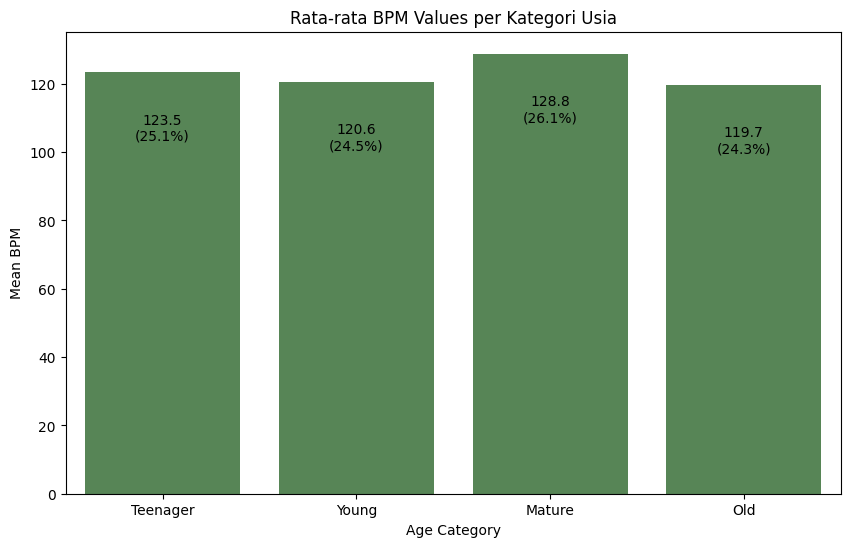

In [435]:
mean_bpm_per_age_category = data_preprocessed.groupby('Age_Category', observed=False)['BPM'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_bpm_per_age_category.index.values,
            y=mean_bpm_per_age_category.values, 
            color='#508D4E')

for i, value in enumerate(mean_bpm_per_age_category.values):
    percentage = (value / mean_bpm_per_age_category.sum()) * 100
    plt.text(i, value - 20, f'{value:.1f}\n({percentage:.1f}%)', ha='center')

plt.title("Rata-rata BPM Values per Kategori Usia")
plt.xlabel("Age Category")
plt.ylabel("Mean BPM")
plt.show()

### 'Music effects' Feature Target Handling

In [436]:
data_preprocessed['Music effects'] = data_preprocessed['Music effects'].dropna()
print("Jumlah missing values pada fitur target (Music effects): ", data_preprocessed.isnull().sum())

Jumlah missing values pada fitur target (Music effects):  Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression              

### Encoding

In [437]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           736 non-null    float64 
 1   Primary streaming service     736 non-null    object  
 2   Hours per day                 736 non-null    float64 
 3   While working                 736 non-null    object  
 4   Instrumentalist               736 non-null    object  
 5   Composer                      735 non-null    object  
 6   Fav genre                     736 non-null    object  
 7   Exploratory                   736 non-null    object  
 8   Foreign languages             736 non-null    object  
 9   BPM                           736 non-null    float64 
 10  Frequency [Classical]         736 non-null    object  
 11  Frequency [Country]           736 non-null    object  
 12  Frequency [EDM]               736 non-null    obje

In [439]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

data_preprocessed = data_preprocessed.replace("", np.nan)

label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    
    non_null_data = data_preprocessed[column].dropna()
    le.fit(non_null_data)

    data_preprocessed.loc[data_preprocessed[column].notna(), column] = le.transform(non_null_data)
    
    label_encoders[column] = le

data_preprocessed.head()


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Total_Health_Point,Age_Category
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,3,0,2,3.0,0.0,1.0,0.0,NaN,4.0,Young
1,63.0,3,1.5,1,0,0,14,1,0,119.0,...,1,3,1,7.0,2.0,2.0,1.0,NaN,12.0,Old
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,1,1,3,7.0,7.0,10.0,2.0,1,26.0,Young
3,61.0,5,2.5,1,0,1,6,1,1,84.0,...,0,0,0,9.0,7.0,3.0,3.0,0,22.0,Old
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,3,0,1,7.0,2.0,5.0,9.0,0,23.0,Young
